<a href="https://colab.research.google.com/github/sakthisairam03/flight-delay-prediction/blob/main/BDF_JComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flight Delay prediction using Spark

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
airlines=pd.read_csv("airlines.csv")
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [ ]:
airports=pd.read_csv("airports.csv")
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
flights=pd.read_csv("flights.csv")
flights_data=flights[0:50000]
flights_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,1,4,7,AA,1524.0,N499AA,DFW,LAS,915.0,...,1010.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49996,2015,1,4,7,AA,2316.0,N3FNAA,STX,MIA,915.0,...,1126.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49997,2015,1,4,7,AS,5.0,N566AS,DCA,LAX,915.0,...,1247.0,37.0,0.0,0.0,NaN,37.0,0.0,0.0,0.0,0.0
49998,2015,1,4,7,DL,688.0,N893AT,ATL,ICT,915.0,...,1037.0,-3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext, SparkConf
sc = SparkContext('local')
print(sc.version)

ValueError: ignored

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Print the tables in the catalog
print(spark.catalog.listTables())

[]


In [ ]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView('temp')

# Examine the tables in the catalog again
print(spark.catalog.listTables())

[]
[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [ ]:
# Read in the airports data
airports = spark.read.csv(['airports.csv'], header = True)

# Show the data
airports.show(10)

+---------+--------------------+-------------+-----+-------+--------+----------+
|IATA_CODE|             AIRPORT|         CITY|STATE|COUNTRY|LATITUDE| LONGITUDE|
+---------+--------------------+-------------+-----+-------+--------+----------+
|      ABE|Lehigh Valley Int...|    Allentown|   PA|    USA|40.65236| -75.44040|
|      ABI|Abilene Regional ...|      Abilene|   TX|    USA|32.41132| -99.68190|
|      ABQ|Albuquerque Inter...|  Albuquerque|   NM|    USA|35.04022|-106.60919|
|      ABR|Aberdeen Regional...|     Aberdeen|   SD|    USA|45.44906| -98.42183|
|      ABY|Southwest Georgia...|       Albany|   GA|    USA|31.53552| -84.19447|
|      ACK|Nantucket Memoria...|    Nantucket|   MA|    USA|41.25305| -70.06018|
|      ACT|Waco Regional Air...|         Waco|   TX|    USA|31.61129| -97.23052|
|      ACV|      Arcata Airport|Arcata/Eureka|   CA|    USA|40.97812|-124.10862|
|      ACY|Atlantic City Int...|Atlantic City|   NJ|    USA|39.45758| -74.57717|
|      ADK|        Adak Airp

In [ ]:
flight_data = spark.read.csv(['flights.csv'], header = True)
#flight_data = flight_data.take(25000)
flight_data = flight_data.take(50000)

flights=spark.createDataFrame(flight_data)

# print the tables in catalog
print(spark.catalog.listTables())

# adding data into spark view for sql querying
flights.createOrReplaceTempView('flights')

# print the tables in catalog
print(spark.catalog.listTables())

[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [ ]:
flights.show()

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [ ]:
# Show the data shape
print((flights.count(), len(flights.columns)))

(50000, 31)


In [ ]:
# see all columns in the table
print(flights.columns)

['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [ ]:
query = "SELECT AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE FROM flights LIMIT 5"

flights5 = spark.sql(query)
#flights5.show()

*P2*

In [ ]:
query = "SELECT ORIGIN_AIRPORT, DESTINATION_AIRPORT, COUNT(*) as N FROM flights GROUP BY ORIGIN_AIRPORT, DESTINATION_AIRPORT"


flight_counts = spark.sql(query)
pd_counts = flight_counts.toPandas()

print(pd_counts.head())

  ORIGIN_AIRPORT DESTINATION_AIRPORT   N
0            BQN                 MCO   8
1            PHL                 MCO  46
2            MCI                 IAH  19
3            SPI                 ORD  10
4            SNA                 PHX  36


In [ ]:
# Create the DataFrame flights
flights = spark.table("flights")

# Add duration_hrs
flights = flights.withColumn('duration_hrs', flights.AIR_TIME/60.)

flights.select('duration_hrs').show(10)

+------------------+
|      duration_hrs|
+------------------+
| 2.816666666666667|
| 4.383333333333334|
| 4.433333333333334|
|               4.3|
| 3.316666666666667|
| 3.433333333333333|
| 2.566666666666667|
|               3.8|
|2.8833333333333333|
|               3.1|
+------------------+
only showing top 10 rows



In [ ]:
# Filter flights by passing a string
long_flights1 = flights.filter("DISTANCE > 1000")

# Filter flights by passing a column of boolean values
long_flights2 = flights.filter(flights.DISTANCE > 1000)


In [ ]:
selected1 = flights.select('TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',)

temp = flights.select(flights.ORIGIN_AIRPORT, flights.DESTINATION_AIRPORT, flights.AIRLINE)

temp.show()

+--------------+-------------------+-------+
|ORIGIN_AIRPORT|DESTINATION_AIRPORT|AIRLINE|
+--------------+-------------------+-------+
|           ANC|                SEA|     AS|
|           LAX|                PBI|     AA|
|           SFO|                CLT|     US|
|           LAX|                MIA|     AA|
|           SEA|                ANC|     AS|
|           SFO|                MSP|     DL|
|           LAS|                MSP|     NK|
|           LAX|                CLT|     US|
|           SFO|                DFW|     AA|
|           LAS|                ATL|     DL|
|           DEN|                ATL|     DL|
|           LAS|                MIA|     AA|
|           LAX|                MSP|     DL|
|           SLC|                ATL|     DL|
|           SEA|                MSP|     DL|
|           ANC|                SEA|     AS|
|           ANC|                SEA|     DL|
|           SFO|                IAH|     UA|
|           ANC|                PDX|     AS|
|         

In [ ]:
# Define first filter
filterA = flights.ORIGIN_AIRPORT == "SEA"

# Define second filter
filterB = flights.DESTINATION_AIRPORT == "PDX"

# Filter the data, first by filterA then by filterB
selected2 = temp.filter(filterA).filter(filterB)

In [ ]:
# Define avg_speed
avg_speed = (flights.DISTANCE/(flights.AIR_TIME/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights.select('TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', avg_speed)

# Create the same table using a SQL expression
speed2 = flights.selectExpr('TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', "DISTANCE/(AIR_TIME/60) as avg_speed")

*P3*

In [ ]:
#Cast the columns to integers
flights = flights.withColumn("MONTH", flights.MONTH.cast("integer"))
flights = flights.withColumn("DAY_OF_WEEK", flights.DAY_OF_WEEK.cast("integer"))
flights = flights.withColumn("AIR_TIME", flights.AIR_TIME.cast("integer"))
flights = flights.withColumn("DISTANCE", flights.DISTANCE.cast("double"))
flights = flights.withColumn("ARRIVAL_DELAY", flights.ARRIVAL_DELAY.cast("integer"))

In [ ]:
# Find the shortest flight from PDX in terms of distance
flights.filter(flights.ORIGIN_AIRPORT == 'PDX').groupBy().min('DISTANCE').show()

# Find the longest flight from SEA in terms of air time
flights.filter(flights.ORIGIN_AIRPORT == 'SEA').groupBy().max('AIR_TIME').show()

+-------------+
|min(DISTANCE)|
+-------------+
|        129.0|
+-------------+

+-------------+
|max(AIR_TIME)|
+-------------+
|          388|
+-------------+



In [ ]:
# Group by tailnum
by_plane = flights.groupBy("TAIL_NUMBER")

# Number of flights each plane made
by_plane.count().show(10)

# Group by origin
by_origin = flights.groupBy("ORIGIN_AIRPORT")

# Average duration of flights from PDX and SEA
by_origin.avg("AIR_TIME").show(10)

+-----------+-----+
|TAIL_NUMBER|count|
+-----------+-----+
|     N38451|    8|
|     N567AA|   16|
|     N623NK|   18|
|     N442AS|   12|
|     N902DE|   13|
|     N4YUAA|   14|
|     N466SW|   19|
|     N516UA|    9|
|     N866AS|   19|
|     N499AA|   15|
+-----------+-----+
only showing top 10 rows

+--------------+------------------+
|ORIGIN_AIRPORT|     avg(AIR_TIME)|
+--------------+------------------+
|           PSE|184.58333333333334|
|           INL|40.833333333333336|
|           MSY|104.45588235294117|
|           PPG|             299.0|
|           GEG| 87.19767441860465|
|           SNA|112.48580441640378|
|           BUR| 72.13939393939394|
|           GRB|              50.9|
|           GTF| 76.77777777777777|
|           IDA| 46.88461538461539|
+--------------+------------------+
only showing top 10 rows



In [ ]:
import pyspark.sql.functions as F

flights = flights.withColumn("DEPARTURE_DELAY", flights.DEPARTURE_DELAY.cast("integer"))

# Group by month and dest
by_month_dest = flights.groupBy('MONTH', 'DESTINATION_AIRPORT')

# Average departure delay by month and destination
by_month_dest.avg('DEPARTURE_DELAY').show(10)

# Standard deviation of departure delay
by_month_dest.agg(F.stddev('DEPARTURE_DELAY')).show(10)

+-----+-------------------+--------------------+
|MONTH|DESTINATION_AIRPORT|avg(DEPARTURE_DELAY)|
+-----+-------------------+--------------------+
|    1|                ACY|                15.5|
|    1|                EYW|   4.235294117647059|
|    1|                OME|                -5.2|
|    1|                RDM|  10.666666666666666|
|    1|                TWF|   5.833333333333333|
|    1|                AEX|  18.703703703703702|
|    1|                GNV|  14.263157894736842|
|    1|                PIB|                53.2|
|    1|                YAK|                25.0|
|    1|                ABE|-0.23076923076923078|
+-----+-------------------+--------------------+
only showing top 10 rows

+-----+-------------------+----------------------------+
|MONTH|DESTINATION_AIRPORT|stddev_samp(DEPARTURE_DELAY)|
+-----+-------------------+----------------------------+
|    1|                ACY|          31.147985002195085|
|    1|                EYW|          24.356019508008895|
|  

In [ ]:
print(airports.columns)

# Examine the data
print(airports.show(10))

['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']
+---------+--------------------+-------------+-----+-------+--------+----------+
|IATA_CODE|             AIRPORT|         CITY|STATE|COUNTRY|LATITUDE| LONGITUDE|
+---------+--------------------+-------------+-----+-------+--------+----------+
|      ABE|Lehigh Valley Int...|    Allentown|   PA|    USA|40.65236| -75.44040|
|      ABI|Abilene Regional ...|      Abilene|   TX|    USA|32.41132| -99.68190|
|      ABQ|Albuquerque Inter...|  Albuquerque|   NM|    USA|35.04022|-106.60919|
|      ABR|Aberdeen Regional...|     Aberdeen|   SD|    USA|45.44906| -98.42183|
|      ABY|Southwest Georgia...|       Albany|   GA|    USA|31.53552| -84.19447|
|      ACK|Nantucket Memoria...|    Nantucket|   MA|    USA|41.25305| -70.06018|
|      ACT|Waco Regional Air...|         Waco|   TX|    USA|31.61129| -97.23052|
|      ACV|      Arcata Airport|Arcata/Eureka|   CA|    USA|40.97812|-124.10862|
|      ACY|Atlantic City Int...

In [ ]:
# Rename the faa column
airports = airports.withColumnRenamed("IATA_CODE", "DESTINATION_AIRPORT")

# Join the DataFrames
flights_with_airports = flights.join(airports , on = 'DESTINATION_AIRPORT', how = 'leftouter')

# Examine the new DataFrame
print(flights_with_airports.columns)
print(flights_with_airports.count())

['DESTINATION_AIRPORT', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'duration_hrs', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']
50000


In [ ]:
flights_with_airports.select('FLIGHT_NUMBER', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE').show(10)

+-------------+--------------------+-----------------+-----+-------+--------+----------+
|FLIGHT_NUMBER|             AIRPORT|             CITY|STATE|COUNTRY|LATITUDE| LONGITUDE|
+-------------+--------------------+-----------------+-----+-------+--------+----------+
|           98|Seattle-Tacoma In...|          Seattle|   WA|    USA|47.44898|-122.30931|
|         2336|Palm Beach Intern...|  West Palm Beach|   FL|    USA|26.68316| -80.09559|
|          840|Charlotte Douglas...|        Charlotte|   NC|    USA|35.21401| -80.94313|
|          258|Miami Internation...|            Miami|   FL|    USA|25.79325| -80.29056|
|          135|Ted Stevens Ancho...|        Anchorage|   AK|    USA|61.17432|-149.99619|
|          806|Minneapolis-Saint...|      Minneapolis|   MN|    USA|44.88055| -93.21692|
|          612|Minneapolis-Saint...|      Minneapolis|   MN|    USA|44.88055| -93.21692|
|         2013|Charlotte Douglas...|        Charlotte|   NC|    USA|35.21401| -80.94313|
|         1112|Dallas

In [ ]:
# Read in the airports data
airlines = spark.read.csv(['airlines.csv'], header = True)

# Show the data shape
print((airlines.count(), len(airlines.columns)))

airlines.show()

(14, 2)
+---------+--------------------+
|IATA_CODE|             AIRLINE|
+---------+--------------------+
|       UA|United Air Lines ...|
|       AA|American Airlines...|
|       US|     US Airways Inc.|
|       F9|Frontier Airlines...|
|       B6|     JetBlue Airways|
|       OO|Skywest Airlines ...|
|       AS|Alaska Airlines Inc.|
|       NK|    Spirit Air Lines|
|       WN|Southwest Airline...|
|       DL|Delta Air Lines Inc.|
|       EV|Atlantic Southeas...|
|       HA|Hawaiian Airlines...|
|       MQ|American Eagle Ai...|
|       VX|      Virgin America|
+---------+--------------------+



# **USING MLLIB**

### **PREPROCESSING**

In [ ]:
# filtering columns
model_data = flights.select('MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'TAIL_NUMBER', 'DESTINATION_AIRPORT', 'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY',)

# Remove missing values
model_data = model_data.filter("ARRIVAL_DELAY is not NULL and AIRLINE is not NULL and AIR_TIME is not NULL and TAIL_NUMBER is not NULL")

# rows left
model_data.count()

48753

In [ ]:
# Create is_late (label)
model_data = model_data.withColumn("is_late", model_data.ARRIVAL_DELAY > 0)

# cast
model_data = model_data.withColumn("is_late", model_data.is_late.cast("integer"))

# rename column
model_data = model_data.withColumnRenamed("is_late", 'label')

In [ ]:
model_data.show(15)

+-----+-----------+-------+-----------+-------------------+--------+--------+-------------+-----+
|MONTH|DAY_OF_WEEK|AIRLINE|TAIL_NUMBER|DESTINATION_AIRPORT|AIR_TIME|DISTANCE|ARRIVAL_DELAY|label|
+-----+-----------+-------+-----------+-------------------+--------+--------+-------------+-----+
|    1|          4|     AS|     N407AS|                SEA|     169|  1448.0|          -22|    0|
|    1|          4|     AA|     N3KUAA|                PBI|     263|  2330.0|           -9|    0|
|    1|          4|     US|     N171US|                CLT|     266|  2296.0|            5|    1|
|    1|          4|     AA|     N3HYAA|                MIA|     258|  2342.0|           -9|    0|
|    1|          4|     AS|     N527AS|                ANC|     199|  1448.0|          -21|    0|
|    1|          4|     DL|     N3730B|                MSP|     206|  1589.0|            8|    1|
|    1|          4|     NK|     N635NK|                MSP|     154|  1299.0|          -17|    0|
|    1|          4| 

In [ ]:
print('Labels distrubution:')
model_data.groupBy('label').count().show()

Labels distrubution:
+-----+-----+
|label|count|
+-----+-----+
|    1|26053|
|    0|22700|
+-----+-----+



In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

# Create a StringIndexer
airline_indexer = StringIndexer(inputCol="AIRLINE", outputCol="airline_index")

# Create a OneHotEncoder
airline_encoder = OneHotEncoder(inputCol="airline_index", outputCol="airline_fact")

In [ ]:
# Create a StringIndexer
dest_indexer = StringIndexer(inputCol="DESTINATION_AIRPORT", outputCol="dest_index")

# Create a OneHotEncoder
dest_encoder = OneHotEncoder(inputCol="dest_index", outputCol="dest_fact")

In [ ]:
# Create a StringIndexer
tail_indexer = StringIndexer(inputCol="TAIL_NUMBER", outputCol="tail_index")

# Create a OneHotEncoder
tail_encoder = OneHotEncoder(inputCol="tail_index", outputCol="tail_fact")

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Make a VectorAssembler of 'MONTH', 'DAY_OF_WEEK', 'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY','AIRLINE', 'TAIL_NUMBER', 'DESTINATION_AIRPORT'
vec_assembler = VectorAssembler(inputCols=["MONTH", "DAY_OF_WEEK", "AIR_TIME", "DISTANCE", "airline_fact", "dest_fact", "tail_fact"], outputCol="features")

In [ ]:
 # Import Pipeline
from pyspark.ml import Pipeline

# Make the pipeline
flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, airline_indexer, airline_encoder, tail_indexer, tail_encoder, vec_assembler])

In [ ]:
piped_data = flights_pipe.fit(model_data).transform(model_data)

# **TRAIN - TEST SPLIT**

In [ ]:
train_data, test_data = piped_data.randomSplit([.7, .3])

In [ ]:
print('data points(rows) in train data :',  train_data.count())
print('data points(rows) in test data :',  test_data.count())

data points(rows) in train data : 34346
data points(rows) in test data : 14407


# **ML MODELS**

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier

import pyspark.ml.tuning as tune
from time import time
import pyspark.ml.evaluation as evals

# Create a BinaryClassificationEvaluator
evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

# **Logistic Regression**

In [ ]:
start_time = time()

# Train a LogisticRegression model
lr = LogisticRegression()

lr_model = lr.fit(train_data)

end_time = time()
#elapsed_time_lr = end_time - start_time
#print("Time to train LogisticRegression model: %.3f seconds" % elapsed_time_lr)

elapsed_time_lr1 = end_time - start_time
print("Time to train LogisticRegression model: %.3f seconds" % elapsed_time_lr1)

Time to train LogisticRegression model: 14.892 seconds


# **Linear SVC**

In [ ]:
start_time = time()

# Train a Linear SVC model
lsvc= LinearSVC()

lsvc_model = lsvc.fit(train_data)

end_time = time()
#elapsed_time_lsvc = end_time - start_time
#print("Time to train LinearSVC model: %.3f seconds" % elapsed_time_lsvc)

elapsed_time_lsvc1 = end_time - start_time
print("Time to train LinearSVC model: %.3f seconds" % elapsed_time_lsvc1)

Time to train LinearSVC model: 21.166 seconds


# **Decision Tree**

In [ ]:
start_time = time()

# Train a DecisionTree model
dt = DecisionTreeClassifier()

model_dt = dt.fit(train_data)

end_time = time()
#elapsed_time_dt = end_time - start_time
#print("Time to train DecisionTree model: %.3f seconds" % elapsed_time_dt)

elapsed_time_dt1 = end_time - start_time
print("Time to train DecisionTree model: %.3f seconds" % elapsed_time_dt1)

Time to train DecisionTree model: 22.229 seconds


# **Random Forest**

In [ ]:
start_time = time()

# Train a RandomForest model
rf = RandomForestClassifier()

model_rf = rf.fit(train_data)

end_time = time()
#elapsed_time_rf = end_time - start_time
#print("Time to train RandomForest model: %.3f seconds" % elapsed_time_rf)

elapsed_time_rf1 = end_time - start_time
print("Time to train RandomForest model: %.3f seconds" % elapsed_time_rf1)

Time to train RandomForest model: 17.503 seconds


# **TIME COMPARISON**

**FOR 50000 records**

Text(0.5, 1.0, 'Execution time for different models 50000 records')

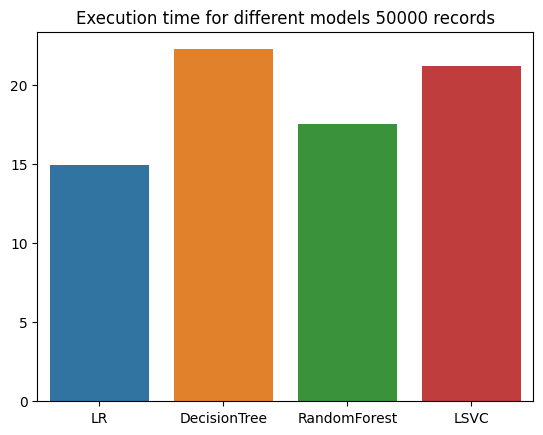

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['LR','DecisionTree','RandomForest','LSVC']
time =[elapsed_time_lr1,elapsed_time_dt1, elapsed_time_rf1,elapsed_time_lsvc1]
x_axis = np.arange(len(models))
sns.barplot(x=x_axis,y= time, label = "Time")

plt.xticks(x_axis, models)
plt.title('Execution time for different models 50000 records')

**FOR 25000 records**

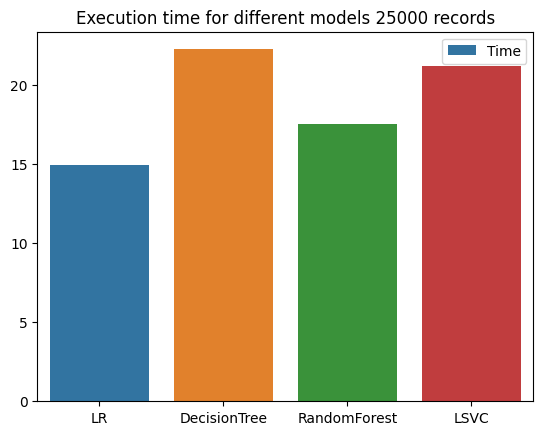

In [ ]:
import matplotlib.pyplot as plt

models = ['LR','DecisionTree','RandomForest','LSVC']
model_time =[elapsed_time_lr1 ,elapsed_time_dt1 , elapsed_time_rf1 ,elapsed_time_lsvc1]
x_axis = np.arange(len(models))
sns.barplot(x=x_axis,y= time, label = "Time")


plt.xticks(x_axis, models)
plt.title('Execution time for different models 25000 records')
plt.legend()
plt.show()